<a href="https://colab.research.google.com/github/HackyRoot/SeeFood/blob/master/SeeFood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SeeFood

## Import packages

In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt

## Load data

Source: https://www.kaggle.com/dansbecker/hot-dog-not-hot-dog

In [4]:
!wget https://raw.githubusercontent.com/HackyRoot/SeeFood/master/data.zip
!unzip data.zip
!rm data.zip*
!ls

--2020-06-14 05:36:51--  https://raw.githubusercontent.com/HackyRoot/SeeFood/master/data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46841867 (45M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]  44.67M  50.9MB/s    in 0.9s    

2020-06-14 05:36:56 (50.9 MB/s) - ‘data.zip’ saved [46841867/46841867]

Archive:  data.zip
   creating: data/
   creating: data/val/
   creating: data/val/hot_dog/
  inflating: data/val/hot_dog/527633.jpg  
  inflating: data/val/hot_dog/528022.jpg  
  inflating: data/val/hot_dog/530316.jpg  
  inflating: data/val/hot_dog/531567.jpg  
  inflating: data/val/hot_dog/533172.jpg  
  inflating: data/val/hot_dog/533521.jpg  
  inflating: data/val/hot_dog/537584.jpg  
  inflating: data/val/hot_dog/

In [0]:
data_dir = 'data/'

In [6]:
!ls data/train

hot_dog  not_hot_dog


In [0]:
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')

In [0]:
train_hotdog_dir = os.path.join(train_dir, 'hot_dog')
val_hotdog_dir = os.path.join(val_dir, 'hot_dog')

train_not_hotdog_dir = os.path.join(train_dir, 'not_hot_dog')
val_not_hotdog_dir = os.path.join(val_dir, 'not_hot_dog')

## Understand the data

In [0]:
num_train_hd = len(os.listdir(train_hotdog_dir))
num_val_hd = len(os.listdir(val_hotdog_dir))

num_train_nhd = len(os.listdir(train_not_hotdog_dir))
num_val_nhd = len(os.listdir(val_not_hotdog_dir))

total_train = num_train_hd + num_train_nhd
total_val = num_val_hd + num_val_nhd

In [10]:
print('total training hotdog images: ', num_train_hd)
print('total validation hotdog images: ', num_val_hd)

print('total training not-hotdog images: ', num_train_nhd)
print('total validation not-hotdog images: ', num_val_nhd)

print('-----------------------------------')

print('total training images: ', total_train)
print('total validation images: ', total_val)

total training hotdog images:  397
total validation hotdog images:  101
total training not-hotdog images:  397
total validation not-hotdog images:  102
-----------------------------------
total training images:  794
total validation images:  203


## Data preparation

In [0]:
batch_size = 24
epochs = 15
IMG_SIZE = 224

In [0]:
train_image_generator = ImageDataGenerator(rescale=1/255,
                                           rotation_range=40,
                                           height_shift_range=0.2,
                                           width_shift_range=0.2,
                                           shear_range=0.2,
                                           horizontal_flip=True)

validation_image_generator = ImageDataGenerator(rescale=1/255)

In [33]:
train_data_gen = train_image_generator.flow_from_directory(batch_size = batch_size, 
                                          directory=train_dir,
                                          shuffle=True,
                                          target_size=[IMG_SIZE, IMG_SIZE],
                                          class_mode='binary')

Found 794 images belonging to 2 classes.


In [34]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                                     directory=val_dir,
                                                                     shuffle=True,
                                                                     target_size=[IMG_SIZE, IMG_SIZE],
                                                                     class_mode='binary')

Found 203 images belonging to 2 classes.


## Visualize training images

In [0]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize=(20, 20))
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

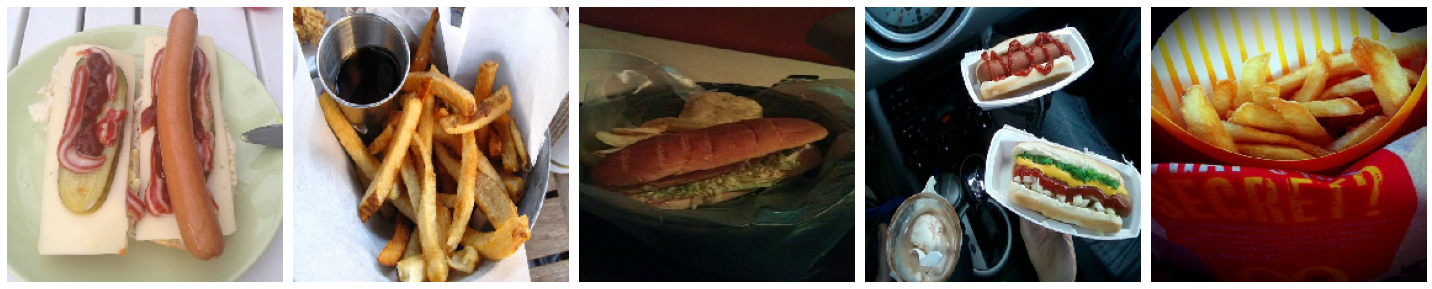

In [16]:
sample_training_images, _ = next(train_data_gen)

plotImages(sample_training_images)

## Create the model

In [0]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=[IMG_SIZE, IMG_SIZE, 3]),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

## Compile the model

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Model summary

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)            

In [37]:
history = model.fit(train_data_gen, 
                    validation_data=val_data_gen,
                    epochs=20,
                    steps_per_epoch=18,
                    validation_steps=5,
                    verbose=2)

Epoch 1/20
18/18 - 7s - loss: 0.6761 - accuracy: 0.5585 - val_loss: 0.6378 - val_accuracy: 0.6333
Epoch 2/20
18/18 - 7s - loss: 0.6688 - accuracy: 0.5764 - val_loss: 0.6589 - val_accuracy: 0.6167
Epoch 3/20
18/18 - 7s - loss: 0.6570 - accuracy: 0.5903 - val_loss: 0.6400 - val_accuracy: 0.6000
Epoch 4/20
18/18 - 7s - loss: 0.6494 - accuracy: 0.6019 - val_loss: 0.6642 - val_accuracy: 0.5333
Epoch 5/20
18/18 - 7s - loss: 0.6644 - accuracy: 0.5903 - val_loss: 0.6600 - val_accuracy: 0.5500
Epoch 6/20
18/18 - 7s - loss: 0.6509 - accuracy: 0.5878 - val_loss: 0.6552 - val_accuracy: 0.6250
Epoch 7/20
18/18 - 7s - loss: 0.6827 - accuracy: 0.5648 - val_loss: 0.6503 - val_accuracy: 0.5667
Epoch 8/20
18/18 - 7s - loss: 0.6506 - accuracy: 0.6042 - val_loss: 0.6686 - val_accuracy: 0.6083
Epoch 9/20
18/18 - 7s - loss: 0.6645 - accuracy: 0.5829 - val_loss: 0.7143 - val_accuracy: 0.6333
Epoch 10/20
18/18 - 7s - loss: 0.6443 - accuracy: 0.5972 - val_loss: 0.6375 - val_accuracy: 0.6583
Epoch 11/20
18/18 -

16.666666666666668